In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2, os, struct
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from load_mnist import *
%matplotlib inline

Mounted at /content/drive


In [3]:
X_train, Y_train = load_fashion_mnist("/content/drive/MyDrive/Fashion MNIST/data/", kind = 'train')
X_test, Y_test = load_fashion_mnist("/content/drive/MyDrive/Fashion MNIST/data/", kind = 't10k')

In [6]:
# Defines the options for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest'
)

# rotation, horizontal flip and fill mode
def image_augmentation(image, nb_of_augmentation):
    '''
    Generates new images augmentation
    image : raw image
    nb_augmentation: number of augmentations
    images: array with new images
    '''
    images = []
    image = image.reshape(1, img_height, img_width, channels)
    i = 0
    for x_batch in datagen.flow(image, batch_size=1):
        images.append(x_batch)
        i += 1
        if i >= nb_of_augmentation:
            # interrupt augmentation
            break
    return images

In [7]:
def preprocess_data(images, targets, use_augmentation=False, nb_of_augmentation=1):
    """
    images: raw image
    targets: target label
    use_augmentation: True if augmentation should be used
    nb_of_augmentation: If use_augmentation=True, number of augmentations
    """
    X = []
    y = []
    for x_, y_ in zip(images, targets):
        
        # scaling pixels between 0.0-1.0
        x_ = x_ / 255.
        
        # data Augmentation
        if use_augmentation:
            argu_img = image_augmentation(x_, nb_of_augmentation)
            for a in argu_img:
                X.append(a.reshape(img_height, img_width, channels))
                y.append(y_)

        X.append(x_)
        y.append(y_)
    print('*Preprocessing completed: %i samples\n' % len(X))
    return np.array(X), tf.keras.utils.to_categorical(y)

In [8]:
nb_augmentation = 3
img_width  = 28
img_height = 28
channels   = 1

X_train_shaped, y_train_shaped = preprocess_data(
    X_train, Y_train, 
    use_augmentation=True, 
    nb_of_augmentation = nb_augmentation
)

X_test_shaped, y_test_shaped   = preprocess_data(X_test,  Y_test)

*Preprocessing completed: 240000 samples

*Preprocessing completed: 10000 samples



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


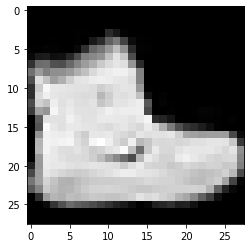

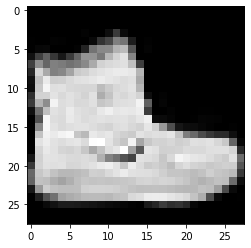

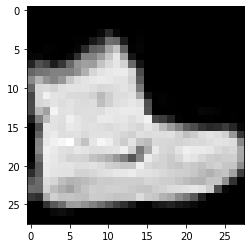

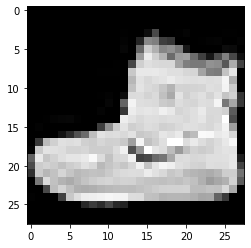

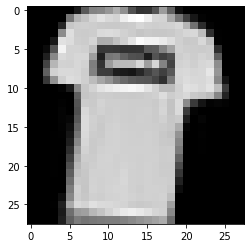

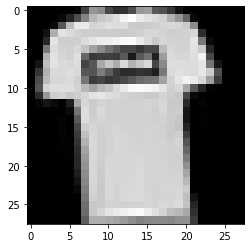

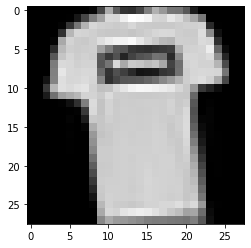

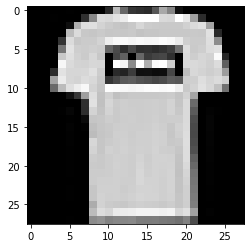

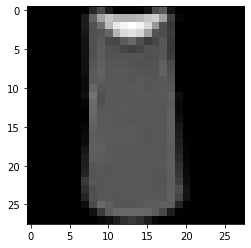

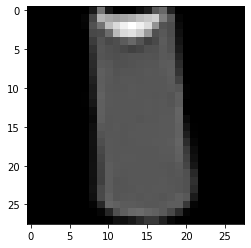

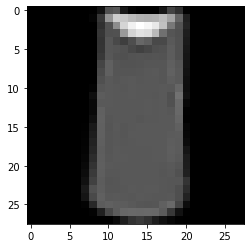

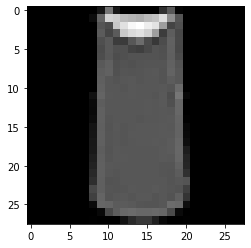

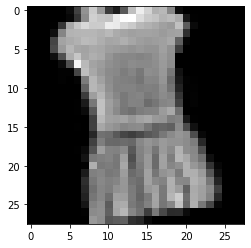

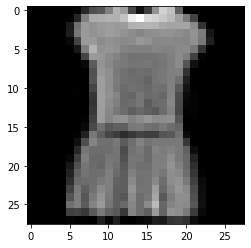

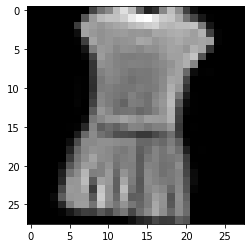

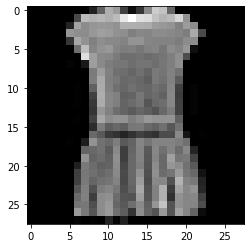

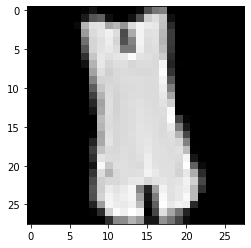

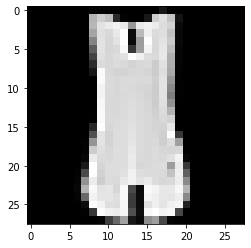

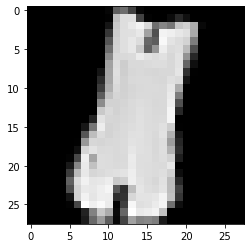

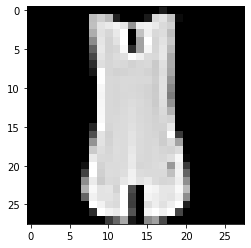

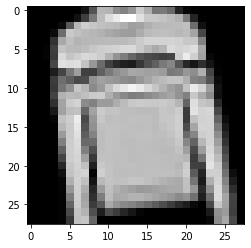

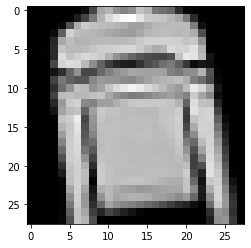

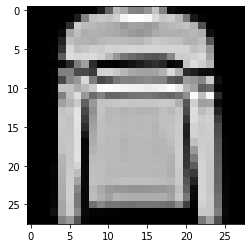

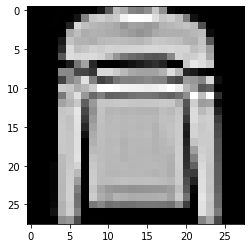

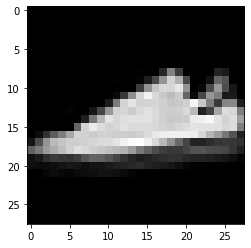

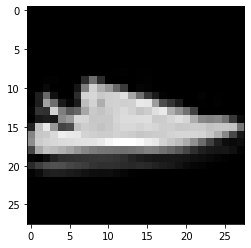

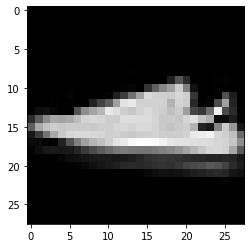

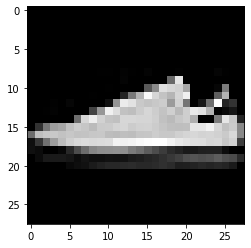

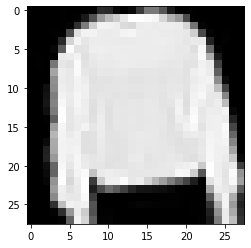

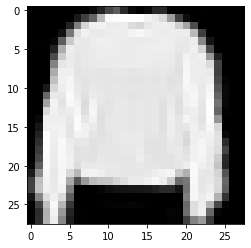

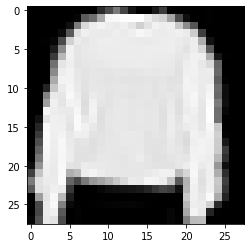

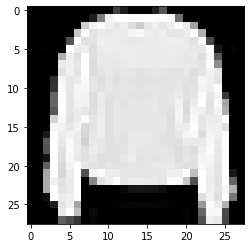

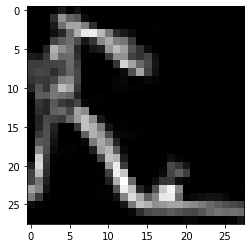

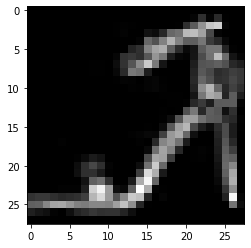

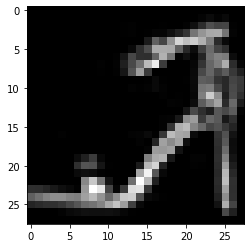

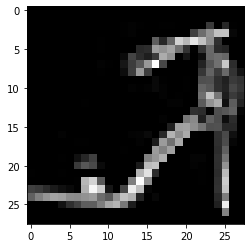

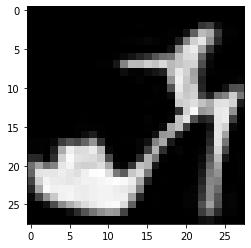

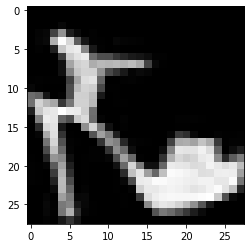

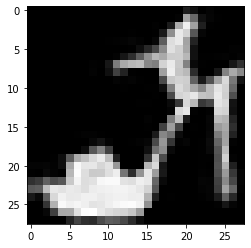

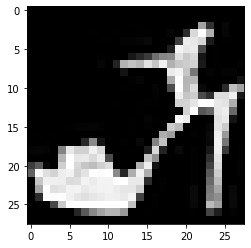

In [9]:
for x in range(40):
    plt.imshow(X_train_shaped[x].reshape((28,28)), cmap="gist_gray")
    plt.show()